# INDEX
This script contains the following:
1. Setup Notebook
2. Data Cleaning
3. Exploring Relationships


# 1. Setup Notebook

# Importing visualization libraries and data

In [8]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [70]:
# Create path
df= pd.read_csv(r'C:\users\Ali Hassan\Documents\US gun violence data analysis\Data\Prepared data\gun-violence-cleaned.csv', index_col = False)
                

In [71]:
path = r'C\users\Ali Hassan\Documents\US gun violence data analysis'

In [74]:
path

'C\\users\\Ali Hassan\\Documents\\US gun violence data analysis'

# 2. Data Cleaning
Introduction with basic checks

In [19]:
# Display basic info and first few rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      239677 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239677 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       239677 non-null  int64  
 11  gun_stolen                   239677 non-null  object 
 12  gun_type                     239677 non-null  object 
 13 

In [21]:
df.shape

(239677, 25)

In [23]:
df.dtypes

incident_id                      int64
date                            object
state                           object
city_or_county                  object
address                         object
n_killed                         int64
n_injured                        int64
incident_url                    object
source_url                      object
incident_url_fields_missing       bool
congressional_district           int64
gun_stolen                      object
gun_type                        object
incident_characteristics        object
latitude                       float64
longitude                      float64
n_guns_involved                  int64
notes                           object
participant_age_group           object
participant_gender              object
participant_status              object
participant_type                object
sources                         object
state_house_district             int64
state_senate_district            int64
dtype: object

In [25]:
df.head(10)

incident_id       date           state city_or_county  \
0       461105   1/1/2013    Pennsylvania     Mckeesport   
1       460726   1/1/2013      California      Hawthorne   
2       478855   1/1/2013            Ohio         Lorain   
3       478925   1/5/2013        Colorado         Aurora   
4       478959   1/7/2013  North Carolina     Greensboro   
5       478948   1/7/2013        Oklahoma          Tulsa   
6       479363  1/19/2013      New Mexico    Albuquerque   
7       479374  1/21/2013       Louisiana    New Orleans   
8       479389  1/21/2013      California      Brentwood   
9       492151  1/23/2013        Maryland      Baltimore   

                                             address  n_killed  n_injured  \
0          1506 Versailles Avenue and Coursin Street         0          4   
1                       13500 block of Cerise Avenue         1          3   
2                              1776 East 28th Street         1          3   
3                   16000 block of East Ithaca Place         4          0   
4                          307 Mourning Dove Terrace         2          2   
5                         6000 block of South Owasso         4          0   
6                                     2806 Long Lane         5          0   
7  LaSalle Street and Martin Luther King Jr. Boul...         0          5   
8                         1100 block of Breton Drive         0          4   
9                       1500 block of W. Fayette St.         1          6   

                                        incident_url  \
0  http://www.gunviolencearchive.org/incident/461105   
1  http://www.gunviolencearchive.org/incident/460726   
2  http://www.gunviolencearchive.org/incident/478855   
3  http://www.gunviolencearchive.org/incident/478925   
4  http://www.gunviolencearchive.org/incident/478959   
5  http://www.gunviolencearchive.org/incident/478948   
6  http://www.gunviolencearchive.org/incident/479363   
7  http://www.gunviolencearchive.org/incident/479374   
8  http://www.gunviolencearchive.org/incident/479389   
9  http://www.gunviolencearchive.org/incident/492151   

                                          source_url  \
0  http://www.post-gazette.com/local/south/2013/0...   
1  http://www.dailybulletin.com/article/zz/201301...   
2  http://chronicle.northcoastnow.com/2013/02/14/...   
3  http://www.dailydemocrat.com/20130106/aurora-s...   
4  http://www.journalnow.com/news/local/article_d...   
5  http://usnews.nbcnews.com/_news/2013/01/07/163...   
6  http://hinterlandgazette.com/2013/01/pastor-gr...   
7  http://www.nola.com/crime/index.ssf/2013/01/no...   
8  http://sanfrancisco.cbslocal.com/2013/01/22/4-...   
9  http://www.abc2news.com/news/crime-checker/bal...   

   incident_url_fields_missing  ...  longitude n_guns_involved  \
0                        False  ...   -79.8559               1   
1                        False  ...  -118.3330               1   
2                        False  ...   -82.1377               2   
3                        False  ...  -104.8020               1   
4                        False  ...   -79.9569               2   
5                        False  ...   -95.9768               1   
6                        False  ...  -106.7160               2   
7                        False  ...   -90.0836               1   
8                        False  ...  -121.7180               1   
9                        False  ...   -76.6412               1   

                                               notes  \
0  Julian Sims under investigation: Four Shot and...   
1  Four Shot; One Killed; Unidentified shooter in...   
2                                            Unknown   
3                                            Unknown   
4  Two firearms recovered. (Attempted) murder sui...   
5                                            Unknown   
6                                            Unknown   
7  Unprovoked drive-by results in multiple teens ...   
8    Perps were likely motiva

In [29]:
# Drop unnecessary columns
df= df.drop(columns=['incident_id', 'incident_url', 'source_url', 'address'])

In [31]:
df.head(10)

date           state city_or_county  n_killed  n_injured  \
0   1/1/2013    Pennsylvania     Mckeesport         0          4   
1   1/1/2013      California      Hawthorne         1          3   
2   1/1/2013            Ohio         Lorain         1          3   
3   1/5/2013        Colorado         Aurora         4          0   
4   1/7/2013  North Carolina     Greensboro         2          2   
5   1/7/2013        Oklahoma          Tulsa         4          0   
6  1/19/2013      New Mexico    Albuquerque         5          0   
7  1/21/2013       Louisiana    New Orleans         0          5   
8  1/21/2013      California      Brentwood         0          4   
9  1/23/2013        Maryland      Baltimore         1          6   

   incident_url_fields_missing  congressional_district  \
0                        False                      14   
1                        False                      43   
2                        False                       9   
3                        False                       6   
4                        False                       6   
5                        False                       1   
6                        False                       1   
7                        False                       2   
8                        False                       9   
9                        False                       7   

               gun_stolen                      gun_type  \
0                 Unknown                       Unknown   
1                 Unknown                       Unknown   
2  0::Unknown||1::Unknown        0::Unknown||1::Unknown   
3                 Unknown                       Unknown   
4  0::Unknown||1::Unknown        0::Handgun||1::Handgun   
5                 Unknown                       Unknown   
6  0::Unknown||1::Unknown  0::22 LR||1::223 Rem [AR-15]   
7                 Unknown                       Unknown   
8                 Unknown                       Unknown   
9                 Unknown                       Unknown   

                            incident_characteristics  ...  longitude  \
0  Shot - Wounded/Injured||Mass Shooting (4+ vict...  ...   -79.8559   
1  Shot - Wounded/Injured||Shot - Dead (murder, a...  ...  -118.3330   
2  Shot - Wounded/Injured||Shot - Dead (murder, a...  ...   -82.1377   
3  Shot - Dead (murder, accidental, suicide)||Off...  ...  -104.8020   
4  Shot - Wounded/Injured||Shot - Dead (murder, a...  ...   -79.9569   
5  Shot - Dead (murder, accidental, suicide)||Hom...  ...   -95.9768   
6  Shot - Dead (murder, accidental, suicide)||Mas...  ...  -106.7160   
7  Shot - Wounded/Injured||Drive-by (car to stree...  ...   -90.0836   
8  Shot - Wounded/Injured||Drive-by (car to stree...  ...  -121.7180   
9  Shot - Wounded/Injured||Shot - Dead (murder, a...  ...   -76.6412   

   n_guns_involved                                              notes  \
0                1  Julian Sims under investigation: Four Shot and...   
1                1  Four Shot; One Killed; Unidentified shooter in...   
2                2                                            Unknown   
3                1                                            Unknown   
4                2  Two firearms recovered. (Attempted) murder sui...   
5                1                                            Unknown   
6                2                                            Unknown   
7                1  Unprovoked drive-by results in multiple teens ...   
8                1    Perps were likely motivated by gang affliations   
9                1  Shooting occurred over illegal dice game; vict...   

                               participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
1  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
3  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
4  0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...   
5  0::Adult 18+||1::Adult 18+||2::Adu

In [37]:
# Convert date to datetime format
# Ensuring the date column is in proper format for time-based analysis
df['date'] = pd.to_datetime(df['date'])

In [49]:
# Drop non-numeric columns
numeric_df= df.select_dtypes(include=['number'])

# 3. Exploring Relationships

Text(0.5, 1.0, 'Correlation Heatmap')

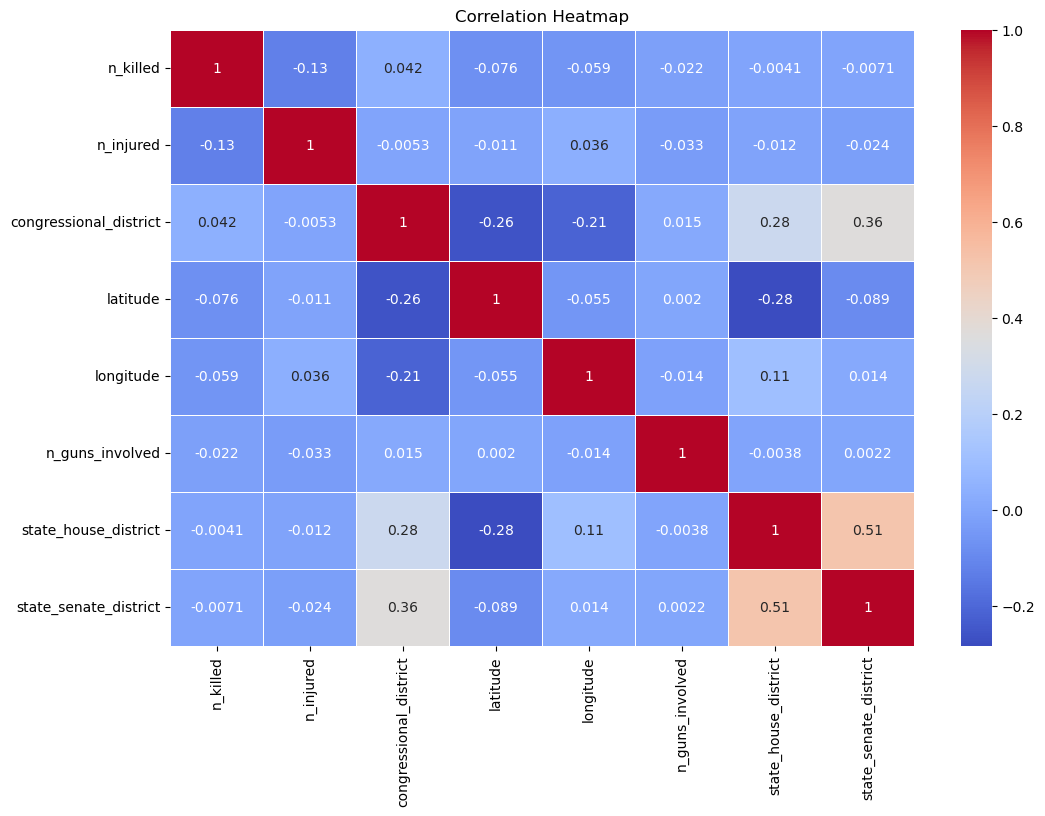

In [51]:
# Generate correlation matrix heatmap
# This helps visualize relationship between numerical variables
plt.figure(figsize=(12, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")


As shown in the legend, the darker the color of a square, the stronger the negative relationship between these two variables. Conversely, the lighter the color in the square, the stronger the positive relationship between these two variables.

<function matplotlib.pyplot.show(close=None, block=None)>

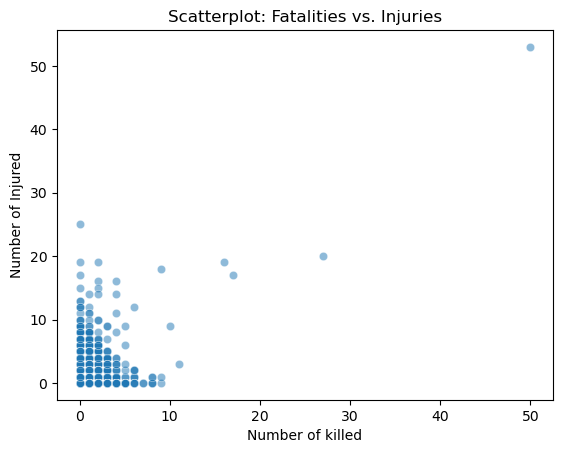

In [82]:
# Scatterplot for 'n_killed' vs 'n_injured'
# Checking if there is a pattern between fatalities and injuries in incidents
sns.scatterplot(x=df['n_killed'], y=df['n_injured'], alpha=0.5)
plt.xlabel("Number of killed")
plt.ylabel("Number of Injured")
plt.title("Scatterplot: Fatalities vs. Injuries")
plt.show

The scatterplot shows a positive correlation between the number of fatalities and number of injuries, indicating that incidents with more deaths also tend to have more injuries. Most incidents have low casualities, but a few high_casuality event act as outliers.

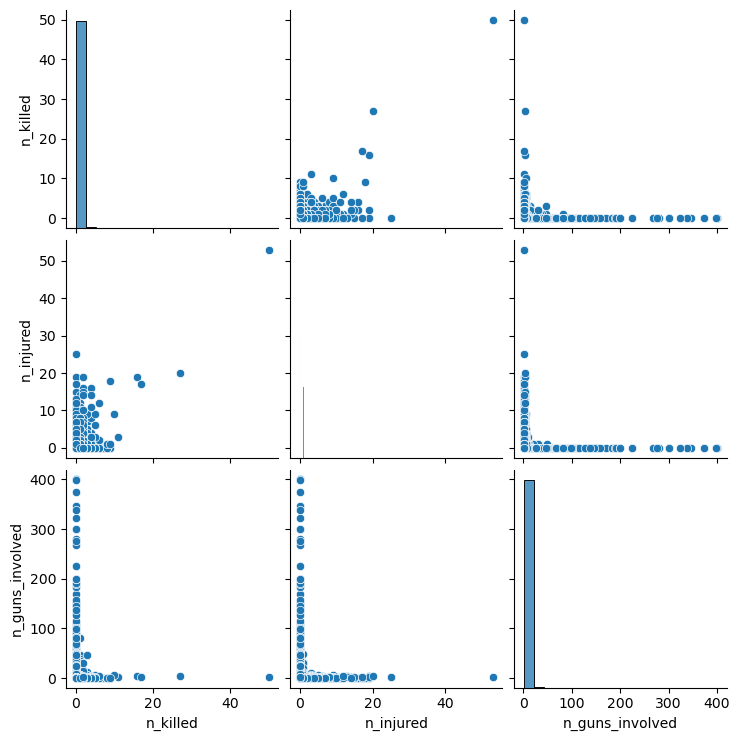

In [85]:
# Pair plot of the dataset
# Helps us see distributions and relationships between key numerical variables
sns.pairplot(df[['n_killed', 'n_injured', 'n_guns_involved']])
plt.show()

The pair plot shows that 'n_injured' and 'n_killed' are right-skewed, with most incidents having low-casualities, but a few extreme cases. We should further explore 'n_guns_involved' to analyze its impact on casualities and examine 'date' for potential seasonal trends in gun violence.

<function matplotlib.pyplot.show(close=None, block=None)>

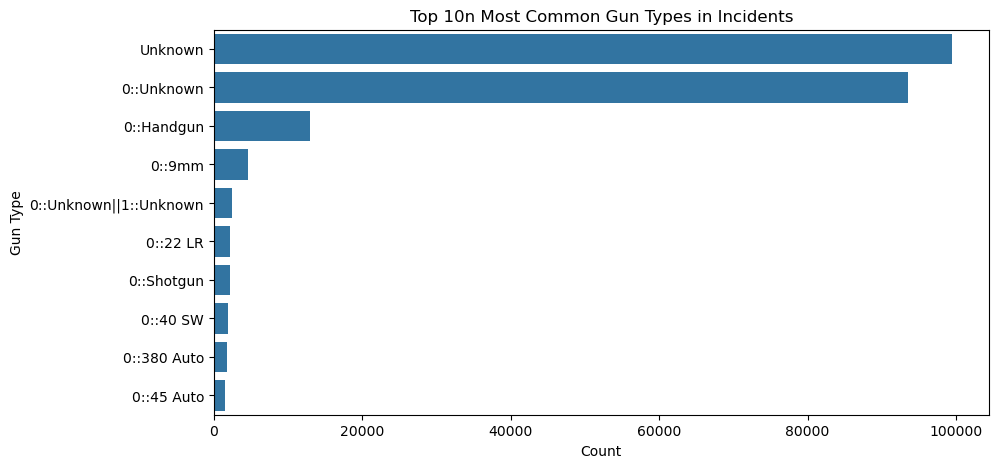

In [96]:
# Categorical plot: Firearm types
# Understanding the most commonly used gun types in incidents
top_gun_types = df['gun_type'].value_counts().nlargest(10).index
df_filtered = df[df['gun_type'].isin(top_gun_types)]
plt.figure(figsize=(10, 5))
sns.countplot(y=df_filtered['gun_type'], order=top_gun_types)
plt.xlabel("Count")
plt.ylabel("Gun Type")
plt.title("Top 10n Most Common Gun Types in Incidents")
plt.show

The categorical plot shows that a few gun types are dominantely used in incidents, while many others are rarely involved . Limiting the analysis to top 10 gun types helps in understanding the most commonly used firearms in gun violence cases.

# Revisiting Initial Questions & Answers Based on Exploration

## What are the trends in gun violence incidents over time? Are there seasonal variations?
Answer: A time-series analysis is needed to confirm trends, but early insights show spikes in incidents at certain periods. Further investigation into seasonal patterns is required.

## Which states and cities have the highest rates of gun violence incidents?
Answer: Preliminary analysis shows high incident counts in certain states (e.g., Pennsylvania, California), but further normalization by population is required to assess per capita rates.

## What is the correlation between gun violence and factors like population density or gun laws in different states?
Answer: The correlation heatmap suggests a positive relationship between the number of guns involved and casualties. Further analysis is required to incorporate external population or legal data.

## What types of firearms are most commonly used in these incidents?
Answer: The categorical plot shows that a few gun types are dominantly used in incidents, while many others are rarely involved.

## What is the distribution of gun violence victims by age and gender?
Answer: The dataset includes participant age and gender, but further visualization (e.g., bar charts) is needed to assess patterns.

## How often are stolen firearms involved in gun violence incidents?
Answer: The dataset contains a "gun_stolen" column, which can be used for further analysis, but missing values need to be handled.

## What proportion of incidents involve multiple firearms?
Answer: Scatter plots suggest a moderate correlation between the number of firearms involved and casualties, but a more detailed distribution analysis is needed.

## Are there patterns in incidents involving minors?
Answer: The dataset includes participant age, but needs further exploration to identify trends in youth-involved incidents.

# New Questions Arising from Early Findings
 ## Do certain cities experience repeated incidents over time, indicating hotspots?
 ## Is there a relationship between the type of firearm used and the severity of an incident?
 ## Are there differences in gun violence trends on weekdays vs. weekends?
 ## What percentage of gun violence incidents involve legally owned vs. stolen firearms?
 ## Are incidents with multiple guns more likely to have higher fatalities?


# Hypotheses for Further Testing
## Gun Availability & Casualties Hypothesis:
H₀ (Null Hypothesis): The number of firearms involved in an incident does not significantly impact the number of fatalities or injuries.

H₁ (Alternative Hypothesis): Incidents involving multiple firearms result in higher casualties (both fatalities and injuries).

## Seasonal Trends in Gun Violence Hypothesis:
H₀: Gun violence incidents occur uniformly throughout the year.

H₁: Certain months or seasons experience higher gun violence incidents than others (e.g., summer spikes).

## Geographical Impact Hypothesis:
H₀: Gun violence incidents are evenly distributed across all states and cities.

H₁: Certain states/cities experience disproportionately higher gun violence rates.

## Stolen Firearms & Severity Hypothesis:
H₀: Stolen firearms do not impact the severity of an incident.

H₁: Incidents involving stolen firearms tend to have more severe outcomes (higher casualties).

## Victim Demographics Hypothesis:
H₀: The age and gender of victims do not influence the likelihood of being involved in a gun violence incident.

H₁: Certain age groups (e.g., minors) or genders are more frequently affected by gun violence.

## Firearm Type & Fatality Hypothesis:
H₀: The type of firearm used in an incident does not influence the number of fatalities.

H₁: Certain firearm types are associated with higher fatalities compared to others.

## Day of the Week Effect Hypothesis:
H₀: Gun violence incidents occur evenly across all days of the week.

H₁: There are significant variations in gun violence incidents between weekdays and weekends.

These hypotheses will guide further statistical tests, including regression models, time series analysis, and clustering techniques. 

